<a href="https://colab.research.google.com/github/ninajung/Test/blob/main/Programmierprojekt_EwA_Punktewolke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

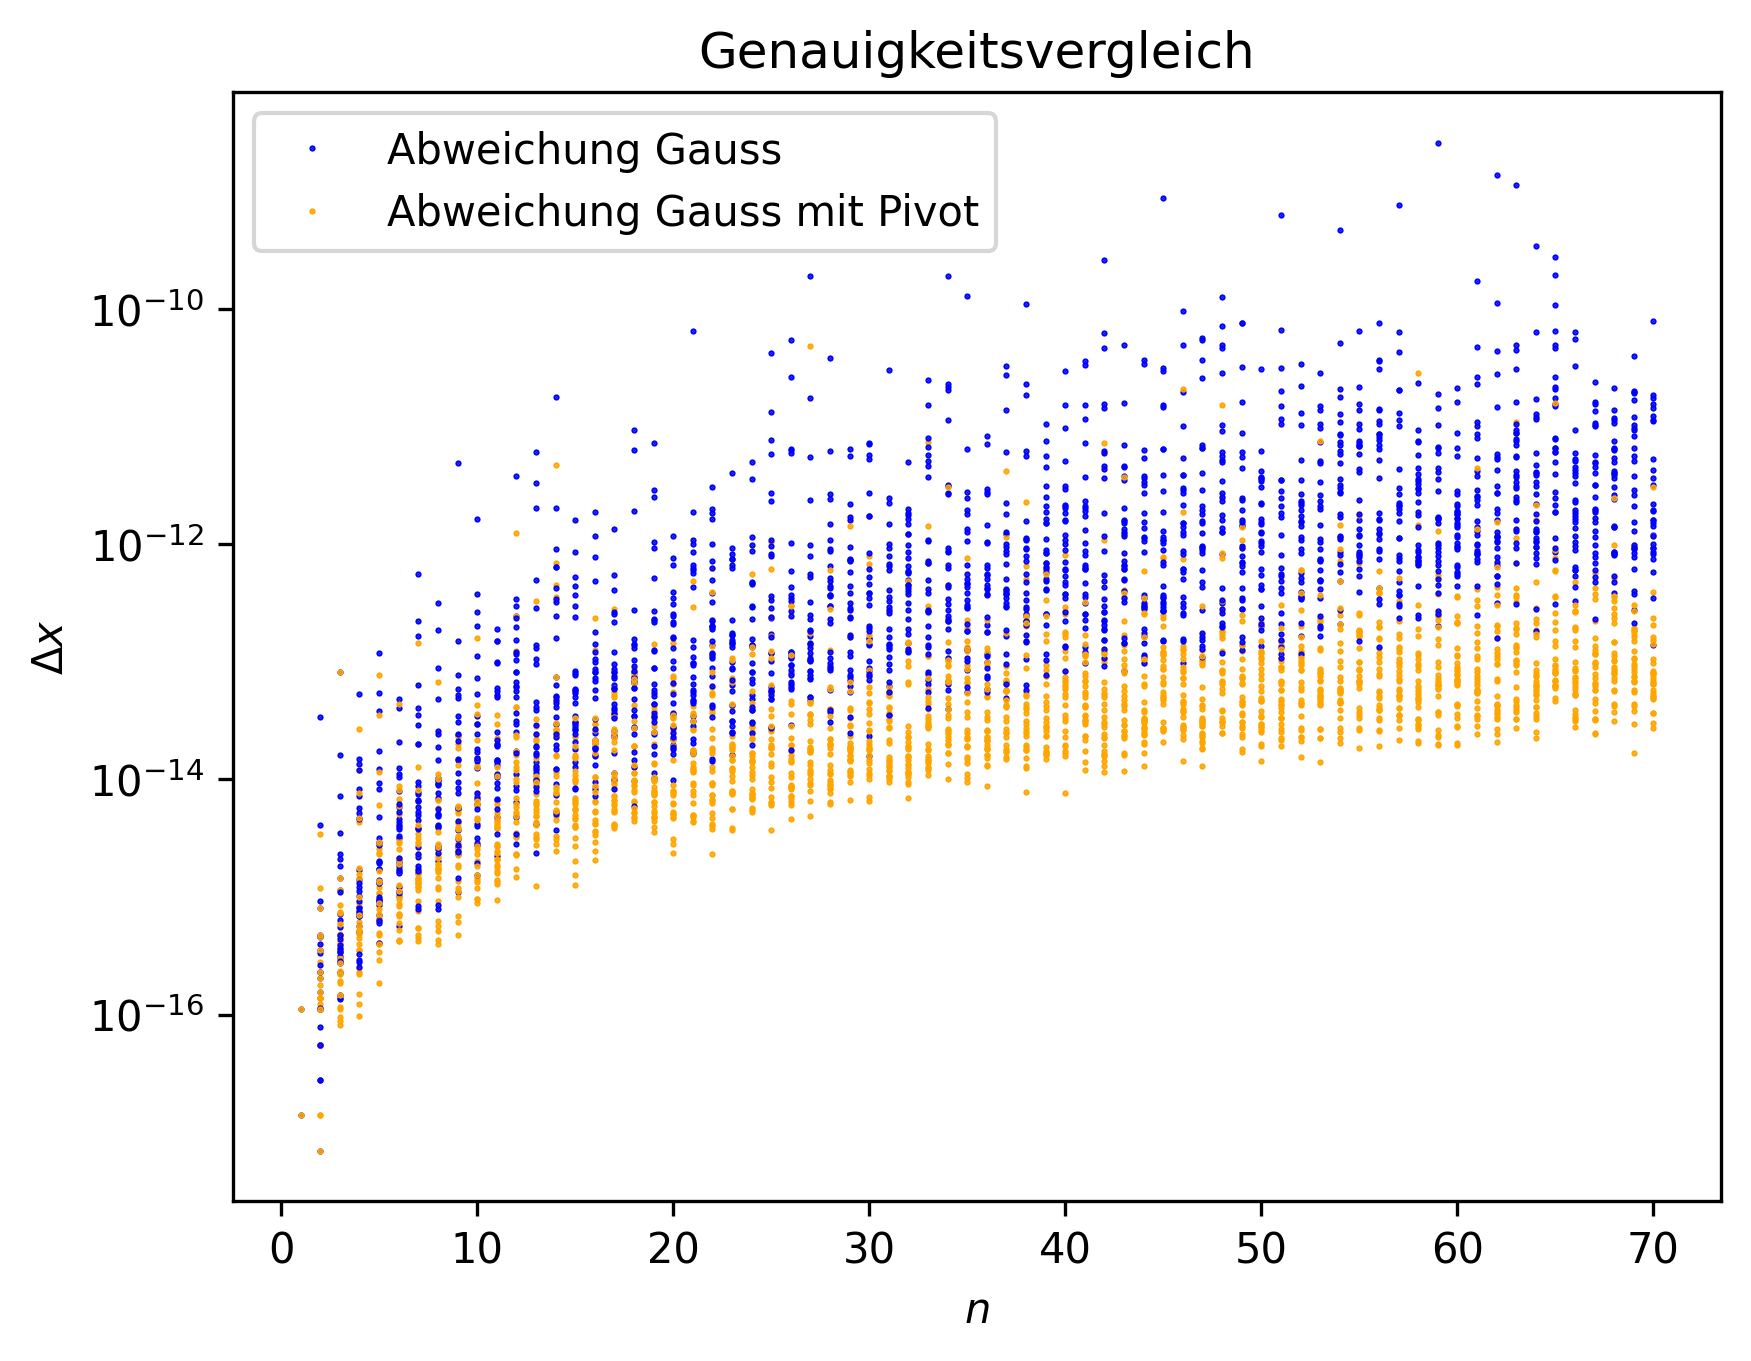

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import copy as cp
import time as tm

def gauss(A,b):
  n = np.size(A,0)
  for i in range(n):
    if(A[i,i] == 0):
      for j in range(i+1,n):
        if(A[j,i] != 0):
          B = np.copy(A[i,:])
          A[i,:] = A[j,:]
          A[j,:] = B
          b1 = np.copy(b[i])
          b[i] = b[j]
          b[j] = b1
          break
    for k in range(i+1,n):
      elim = A[k,i] / A[i,i]
      A[k,:] = A[k,:] - elim * A[i,:]
      b[k] = b[k] - elim * b[i]
  return

def gauss_pivot(A,b):
  n = np.size(A,0)
  for i in range(n):
    index = i
    max = np.abs(A[i,i])
    for j in range(i+1,n):
      if(np.abs(A[j,i]) > max):
        index = j
        max = np.abs(A[j,i])
    if(index != i):
      B = np.copy(A[i,:])
      A[i,:] = A[index,:]
      A[index,:] = B
      b1 = np.copy(b[i])
      b[i] = b[index]
      b[index] = b1
    for k in range(i+1,n):
      elim = A[k,i] / A[i,i]
      A[k,:] = A[k,:] - elim * A[i,:]
      b[k] = b[k] - elim * b[i]
  return

def backwards_subs(A,b):
  n = np.size(A,0)
  x = np.zeros((n,1))
  for i in range(n-1, -1, -1):
    x[i] =(b[i] - np.dot(A[i, (i+1):], x[(i+1):])) / A[i, i]
  return x

def laufzeit_gauss(A,b):
  t1 = tm.perf_counter()
  gauss(A,b)
  t2 = tm.perf_counter()
  return t2 - t1

def laufzeit_gauss_pivot(A,b):
  t1 = tm.perf_counter()
  gauss_pivot(A,b)
  t2 = tm.perf_counter()
  return t2 - t1

def fehler(x,y):
  return np.linalg.norm(x-y)

def zufall(n):
  A = np.random.random((n,n)) #random gibt Zufallszahlen im Intervall [0,1)
  x = np.random.random((n,1))
  b = A@x
  return A, x, b

def test(n,m):
  time_gauss = np.zeros(n)
  time_gauss_pivot = np.zeros(n)

  error_gauss = np.zeros((n,m))
  error_gauss_pivot = np.zeros((n,m))
  for i in range(1,n+1):
    time1 = np.zeros(m)
    time2 = np.zeros(m)

    for j in range(m):
      A, x, b = zufall(i)
      A1 = cp.deepcopy(A)
      b1 = cp.deepcopy(b)

      time1[j] = laufzeit_gauss(A,b)
      time2[j] = laufzeit_gauss_pivot(A1,b1)

      x1 = backwards_subs(A,b)
      x2 = backwards_subs(A1,b1)
      error_gauss[i-1,j] = fehler(x, x1)
      error_gauss_pivot[i-1,j] = fehler(x, x2)
    time_gauss[i-1] = np.mean(time1)
    time_gauss_pivot[i-1] = np.mean(time2)
  return time_gauss, time_gauss_pivot, error_gauss, error_gauss_pivot

def print_time(time_g, time_g_p):
  t = np.linspace(1, n, n)
  plt.figure(dpi = 300)
  plt.plot(t, time_g, label = 'Laufzeit Gauss')
  plt.plot(t, time_g_p, label = 'Laufzeit Gauss mit Pivot')
  plt.xlabel('$n$')
  plt.ylabel('$t$ in ms')
  plt.title('Laufzeitvergleich')
  plt.legend()
  #plt.savefig('Laufzeit-Pgp')
  plt.show()
  return


n = 70; m = 30

time_g, time_g_p, error_g, error_g_p = test(n,m)
#print_time(time_g, time_g_p)
tt = np.linspace(1, n, n)
plt.figure(dpi = 300)
for k in range(m):
  if(k == 0):
    plt.semilogy(tt, error_g[:,k],'b.', label = 'Abweichung Gauss', ms = 1)
    plt.semilogy(tt, error_g_p[:,k],'.',color = 'orange', label = 'Abweichung Gauss mit Pivot', ms = 1)
    plt.legend()
  else:
    plt.semilogy(tt, error_g[:,k],'b.', ms = 1)
    plt.semilogy(tt, error_g_p[:,k],'.', color = 'orange', ms = 1)
plt.xlabel('$n$')
plt.ylabel('$\Delta x$')
plt.title('Genauigkeitsvergleich')
plt.savefig('Punktewolke')
plt.show()
